In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
df = pd.read_excel('Когортный анализ.xlsx')
df

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50
...,...,...,...
704835,Z9247,2021-01-10,20
704836,Z9247,2021-01-11,50
704837,Z9247,2021-01-11,70
704838,Z9247,2021-01-11,20


In [17]:
print(df.isnull().sum(), df.duplicated().sum())
df = df.drop_duplicates()

user_id    0
date       0
price      0
dtype: int64 11186


In [18]:
def get_month(x):
  return dt.datetime(x.year, x.month, 1)

df["month_year"]=df["date"].apply(lambda x: get_month(x))
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\3449542560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month_year"]=df["date"].apply(lambda x: get_month(x))


,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01
...,...,...,...,...
704835,Z9247,2021-01-10,20,2021-01-01
704836,Z9247,2021-01-11,50,2021-01-01
704837,Z9247,2021-01-11,70,2021-01-01
704838,Z9247,2021-01-11,20,2021-01-01


In [20]:
df['cohort_month'] = df.groupby('user_id')['month_year'].transform("min")
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\2705497648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cohort_month'] = df.groupby('user_id')['month_year'].transform("min")


,user_id,date,price,month_year,cohort_month
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
...,...,...,...,...,...
704835,Z9247,2021-01-10,20,2021-01-01,2021-01-01
704836,Z9247,2021-01-11,50,2021-01-01,2021-01-01
704837,Z9247,2021-01-11,70,2021-01-01,2021-01-01
704838,Z9247,2021-01-11,20,2021-01-01,2021-01-01


In [23]:
def get_date(df, column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day

date_year, date_month, _ = get_date(df, "date")
cohort_year, cohort_month, _ = get_date(df, "cohort_month")

year_diff = date_year - cohort_year
month_diff = date_month - cohort_month

df["cohort_index"] = year_diff * 12 + month_diff + 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\2640128990.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cohort_index"] = year_diff * 12 + month_diff + 1


In [24]:
data1=df.pivot_table(index="cohort_month",
                       columns="cohort_index",
                       values="user_id",
                       aggfunc=len)
data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort_month,,,,,,,,,,,,,,
2020-01-01,9756.0,8063.0,7004.0,6534.0,6097.0,5067.0,4606.0,4239.0,4078.0,4178.0,3778.0,3735.0,3581.0,755.0
2020-02-01,8260.0,7868.0,5477.0,5492.0,4865.0,4088.0,3225.0,2825.0,2582.0,2144.0,1900.0,1571.0,304.0,NaN
2020-03-01,12928.0,9631.0,8052.0,7733.0,7308.0,5937.0,5579.0,4964.0,4549.0,4545.0,4348.0,892.0,NaN,NaN
2020-04-01,9882.0,8592.0,6182.0,5925.0,5686.0,4067.0,3655.0,3320.0,3309.0,3105.0,597.0,NaN,NaN,NaN
2020-05-01,14663.0,10658.0,8529.0,8196.0,7614.0,6522.0,5877.0,5722.0,5495.0,1119.0,NaN,NaN,NaN,NaN
2020-06-01,11031.0,9615.0,6719.0,6518.0,6218.0,5122.0,4660.0,4195.0,797.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,16650.0,11288.0,8351.0,8195.0,7144.0,6589.0,6145.0,1203.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13139.0,10348.0,7149.0,6970.0,6844.0,5663.0,1025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17390.0,11994.0,8773.0,8568.0,7773.0,1478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
first_column = data1.iloc[:,0]
retention = data1.div(first_column, axis=0)
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort_month,,,,,,,,,,,,,,
2020-01-01,1.0,0.83,0.72,0.67,0.62,0.52,0.47,0.43,0.42,0.43,0.39,0.38,0.37,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.60,0.57,0.46,0.43,0.38,0.35,0.35,0.34,0.07,NaN,NaN
2020-04-01,1.0,0.87,0.63,0.60,0.58,0.41,0.37,0.34,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.73,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.61,0.59,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.68,0.50,0.49,0.43,0.40,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.79,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.69,0.50,0.49,0.45,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


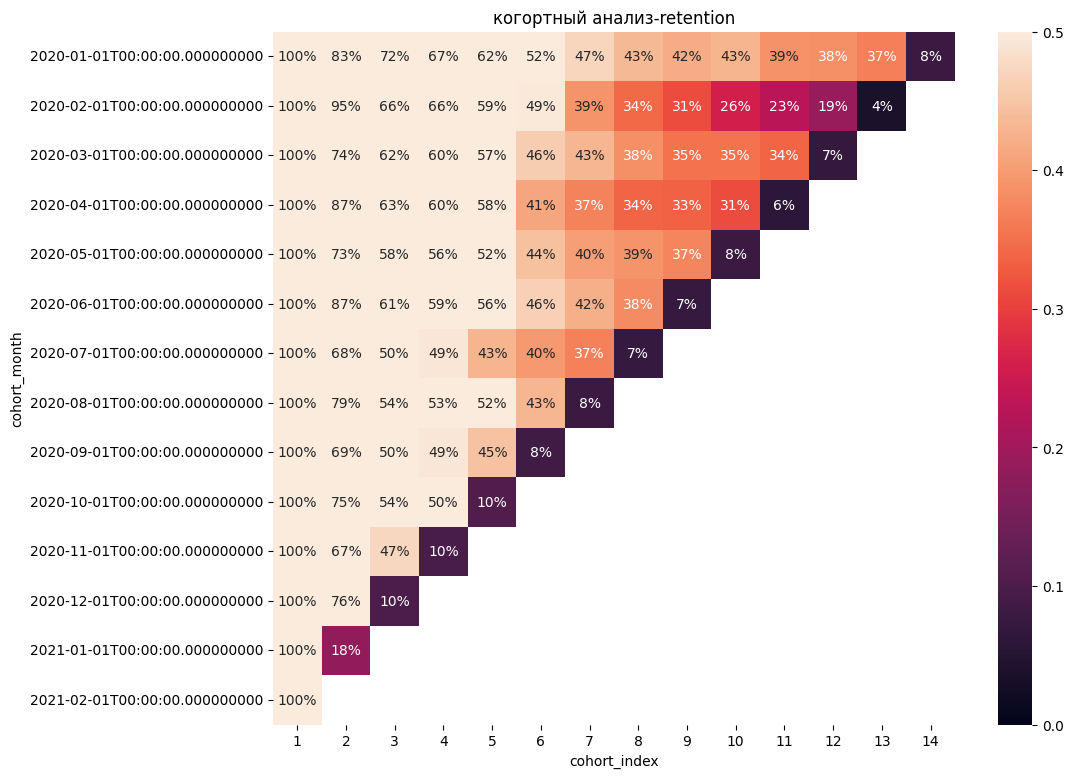

In [26]:
plt.figure(figsize=(11, 9))
plt.title("когортный анализ-retention")
sns.heatmap(data=retention,
            annot=True,
            fmt=".0%",
            vmin=0.0,
            vmax=0.5)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\3820841547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\3820841547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cohort'] = df.groupby('user_id')['date'].transform('min').dt.to_period('M')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17628\3820841547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

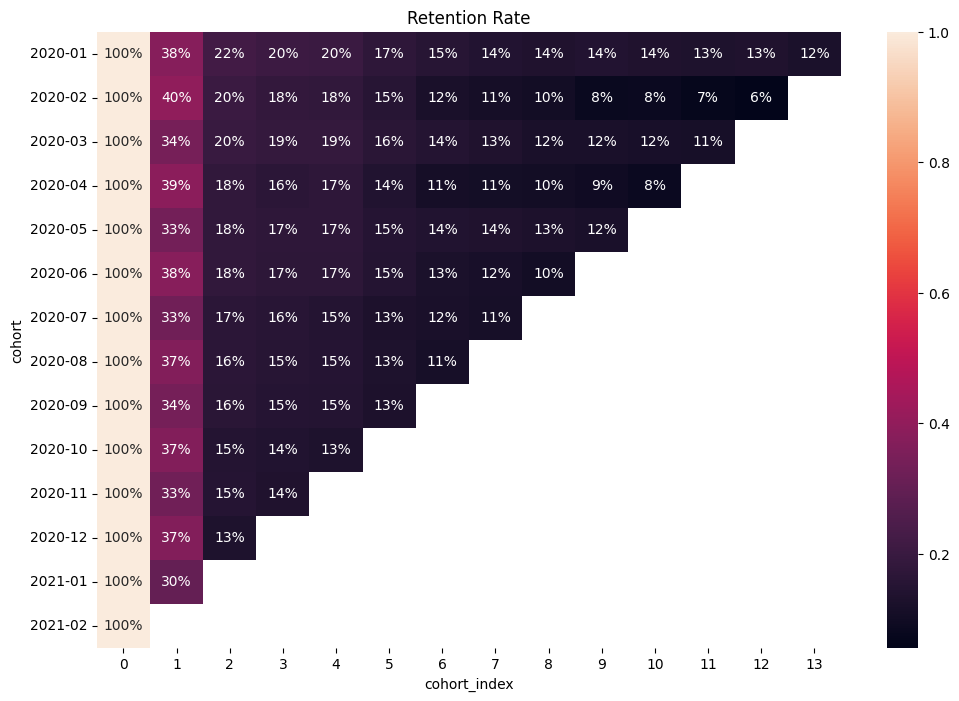

In [27]:
df['date'] = pd.to_datetime(df['date'])
df['cohort'] = df.groupby('user_id')['date'].transform('min').dt.to_period('M')
df['order_month'] = df['date'].dt.to_period('M')
df['cohort_index'] = (df['order_month'] - df['cohort']).apply(lambda x: x.n)

cohort_data = df.groupby(['cohort', 'cohort_index'])['user_id'].nunique().reset_index()

cohort_pivot = cohort_data.pivot_table(index='cohort', columns='cohort_index', values='user_id')

cohort_size = cohort_pivot.iloc[:, 0]
retmx = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(12, 8))
plt.title('Retention Rate')
sns.heatmap(retmx, annot=True, fmt='.0%')
plt.show()

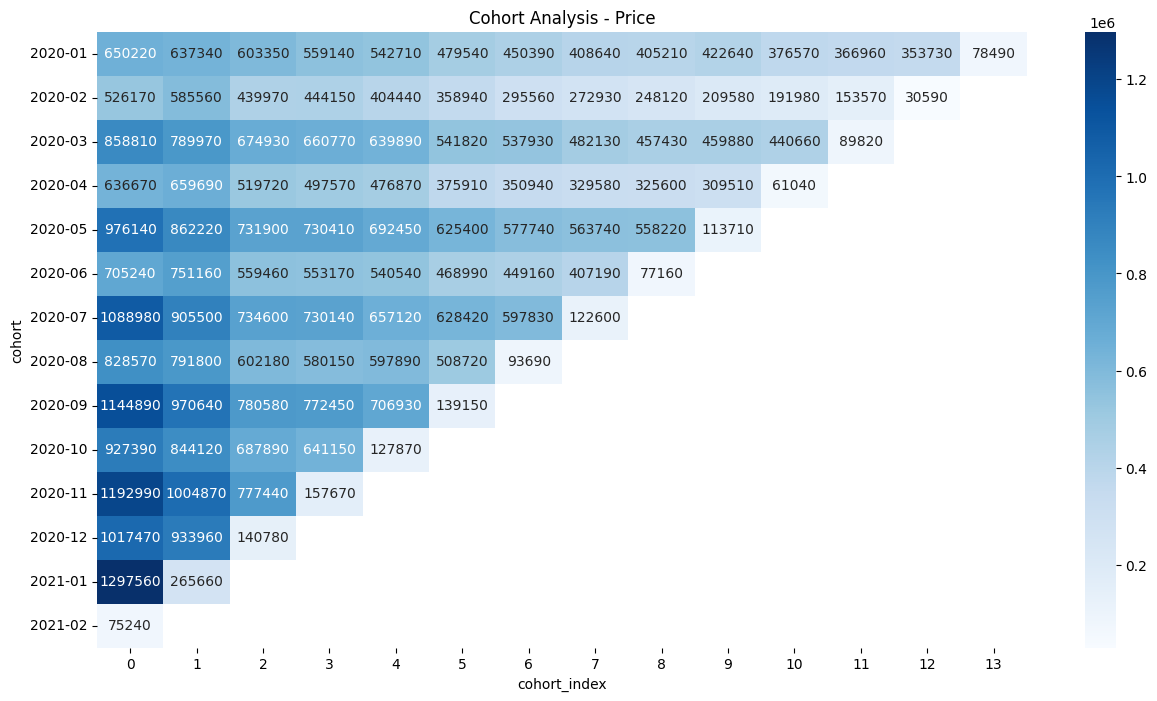

In [29]:
cohort_data_price = df.groupby(['cohort', 'cohort_index'])['price'].sum().reset_index()
cohort_pivot_price = cohort_data_price.pivot_table(index='cohort', columns='cohort_index', values='price')

plt.figure(figsize=(15, 8))
plt.title('Cohort Analysis - Price')
sns.heatmap(cohort_pivot_price, annot=True, fmt='.0f', cmap='Blues')
plt.show()

Retention rate показывает процент возвращаемости клиентов за период 14 месяцев. 

В первые месяцы наблюдается наилучшая возращаемость. В принципе в каждой группе наблюдается резкий спад в самом начале, после чего снижение идет примерно в одинаковом темпе. Однако всё равно выделяется первая группа в первые месяцы, ибо имеет наибольший процент среди остальных. Хочется еще отметить, что для второй группы, несмотря на 40% во втором месяце, процент снижается до 6%. Когорта на январь 2021 года выделяется наименьшим процентом.

Cohort Analysis - Price показывает суммы покупок для каждой когорты за период 14 месяцев

Заметно снижение сумм в соответсвии со снижением возвращаемости клиентов. Кроме того у поздних когорт в первые месяцы наблюдается сильное увеличение сумм по сравнению с первыми когортами: у когорты за январь 2021 в первый месяц сумма почти вдвое больше чем у когорты за январь 2020. Кроме того, выделяются когорты за сентябрь и за ноябрь 2020 года, т.к. их суммы выше чем у соседних, несмотря на то, что возвращаемость ниже. Вероятно в эти периоды были сделаны разовые дорогостоящие покупки. И для когорты за февраль 2020 года не смотря на возвращаемость в 40% в первый месяц сумма составила наименьшее значение из всех, однако далее суммы уменьшаются в соответствии с возвращаемостью.